In [1]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [2]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=csv_files[4:5]
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_March21_10_50_01_.csv', '_April26_10_09_42_.csv', '_April10_13_36_44_.csv', '_April06_13_56_06_.csv', '_April27_16_36_32_.csv', '_April24_19_14_20_.csv', '_April23_14_41_54_.csv', '_April16_16_41_25_.csv', '_April25_13_41_37_.csv', '_April04_17_16_55_.csv', '_March29_18_58_37_.csv']
['_April27_16_36_32_.csv']


# Box plot

In [3]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata/_April27_16_36_32_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        75.863847  0.741514   0.832845              5000  active learning   
1        83.238783  0.834639   0.876600              5500  active learning   
2        83.960805  0.898172   0.841762              6000  active learning   
3        84.992264  0.841601   0.898699              6500  active learning   
4        86.591026  0.877285   0.894410              7000  active learning   
..             ...       ...        ...               ...              ...   
195      88.189789  0.894691   0.904930              7500  active learning   
196      88.086643  0.885988   0.910555              8000  active learning   
197      87.209902  0.861619   0.917516              8500  active learning   
198      89.272821  0.890339   0.925792              9000  active learning   
199      88.860237  0.886858   0.922172              9500  active learning   

           method  seed

# Influence model architecture

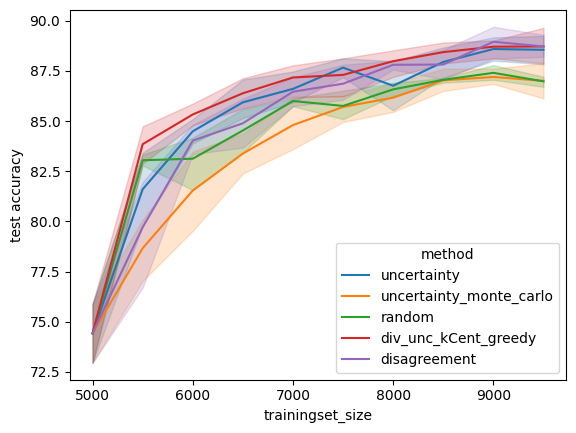

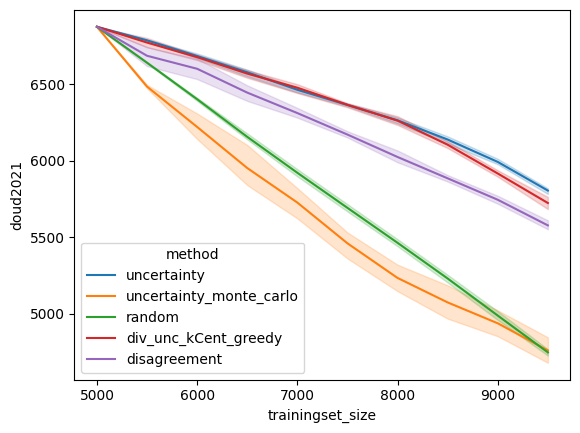

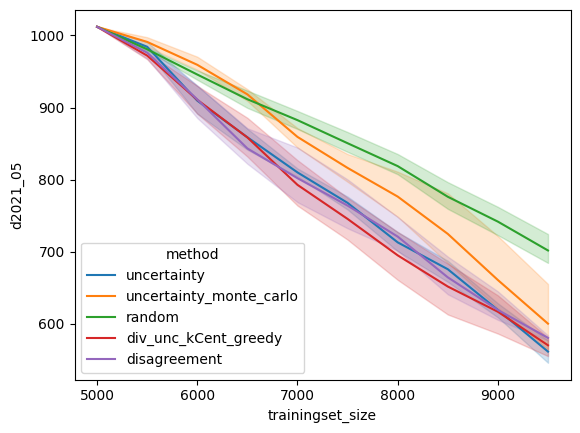

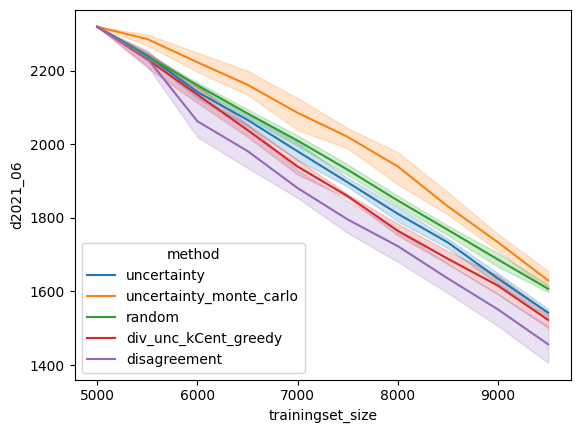

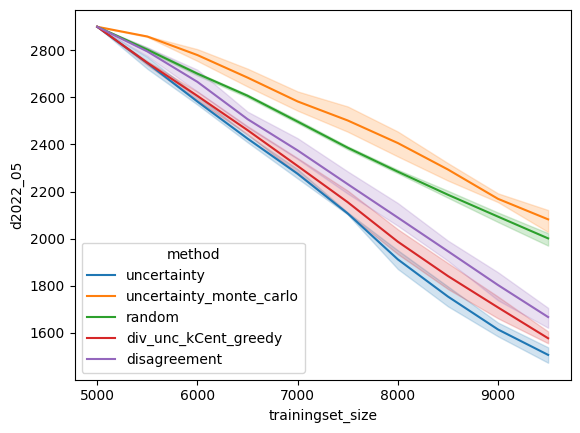

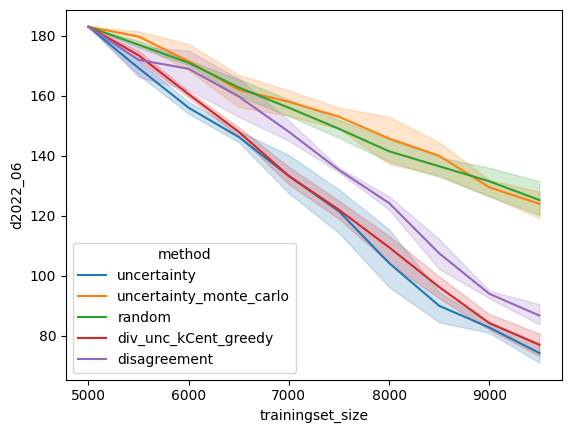

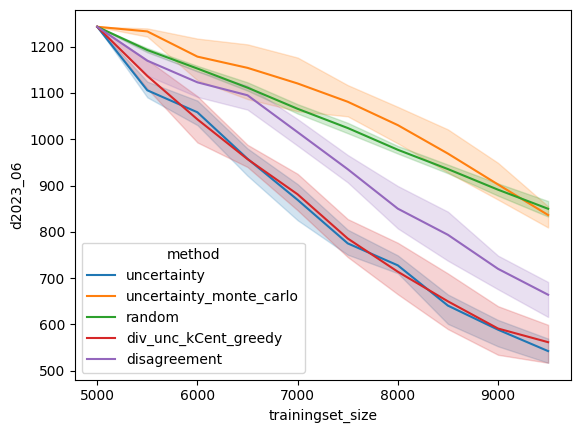

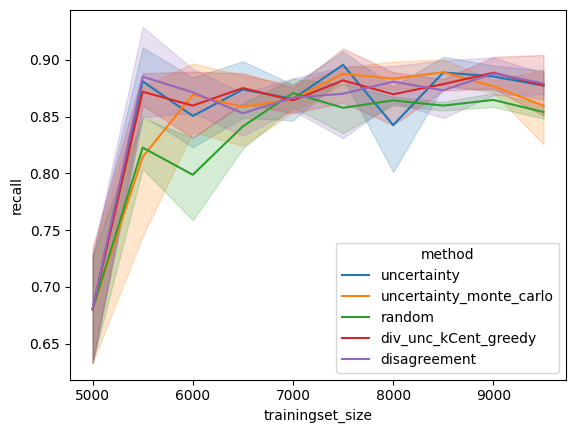

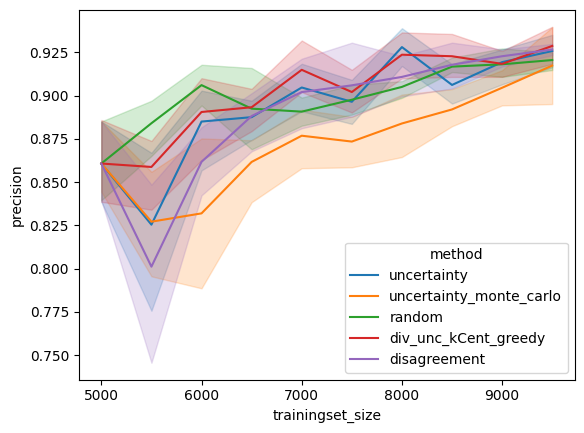

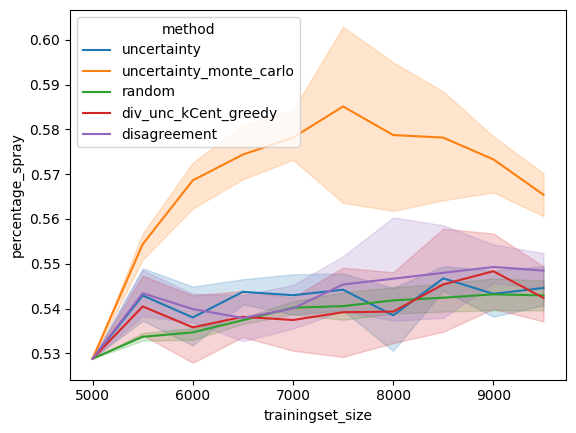

In [6]:
[ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed',"percentage_spray","doud2021",
                   "d2021_05","d2021_06","d2022_05","d2022_06","d2023_06","moud2021","m2021_05","m2021_06","m2022_05"
                   ,"m2022_06","m2023_06"]
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="doud2021", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2021_05", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2021_06", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2022_05", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2022_06", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2023_06", hue="method")
plt.show()
"""
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()
"""
#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

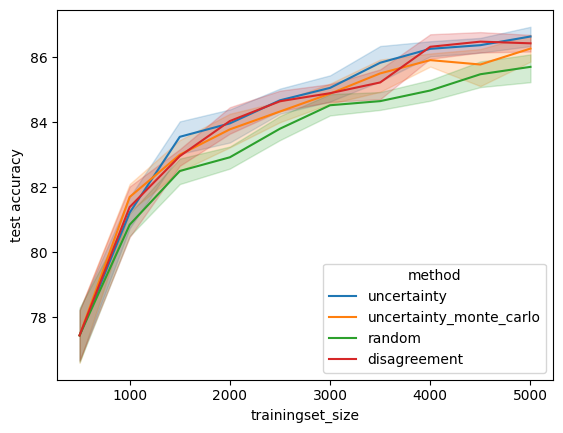

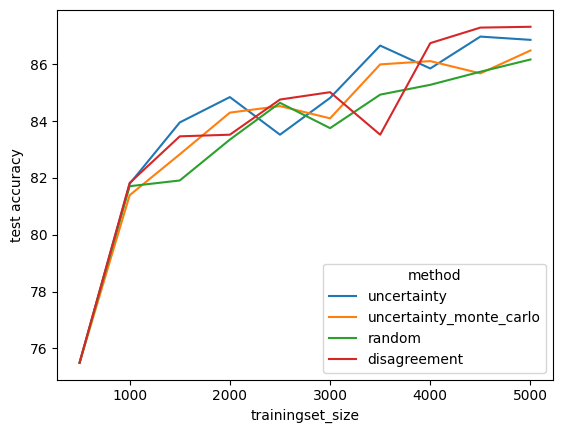

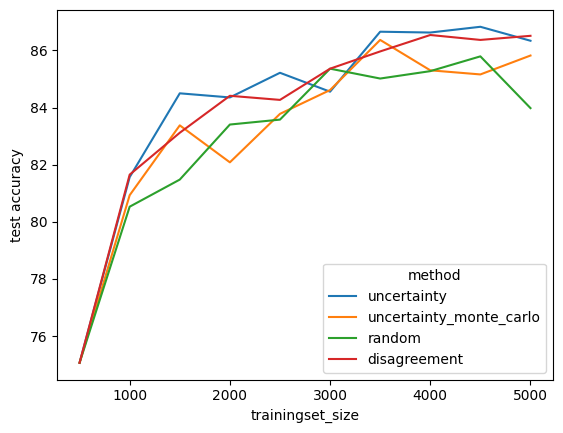

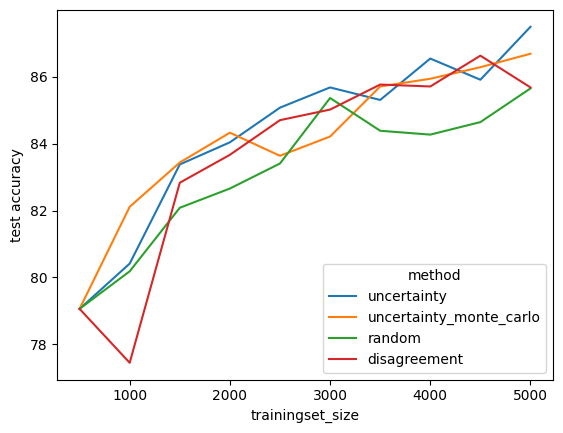

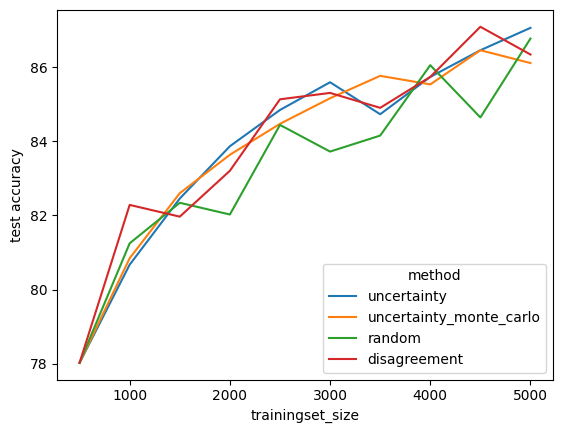

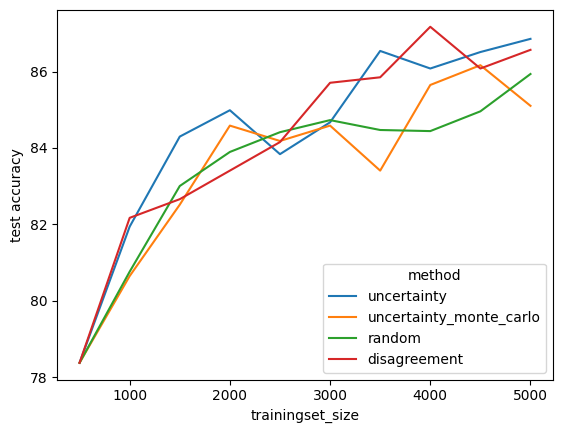

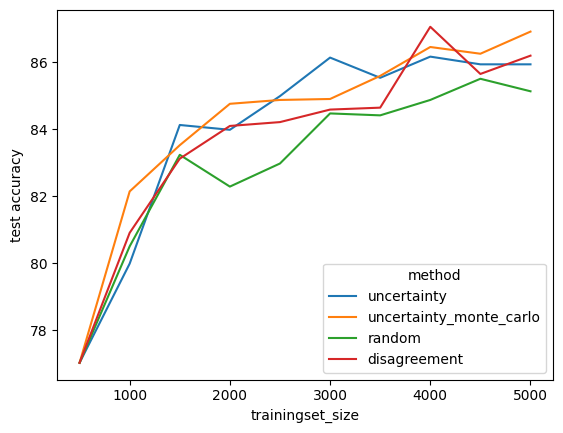

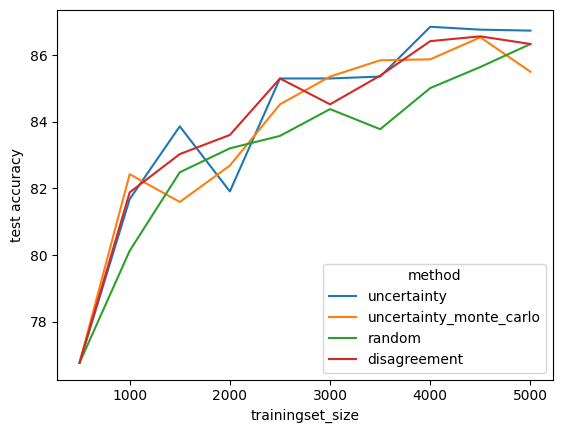

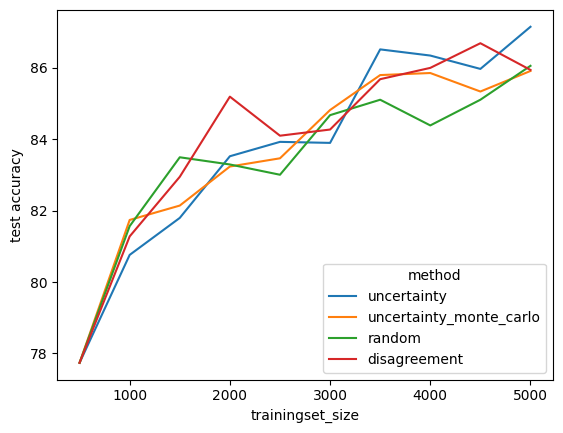

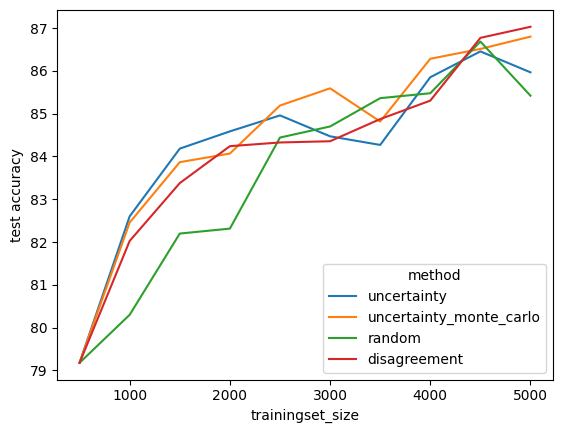

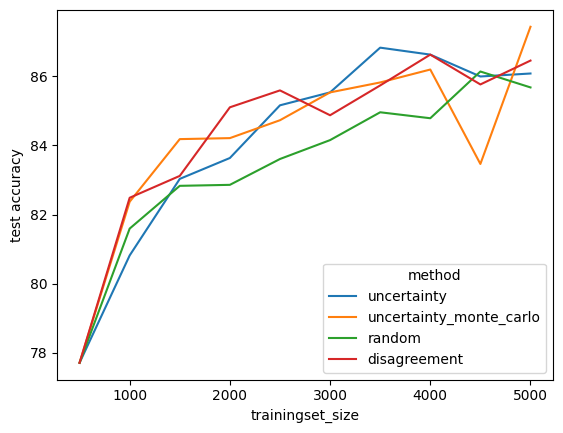

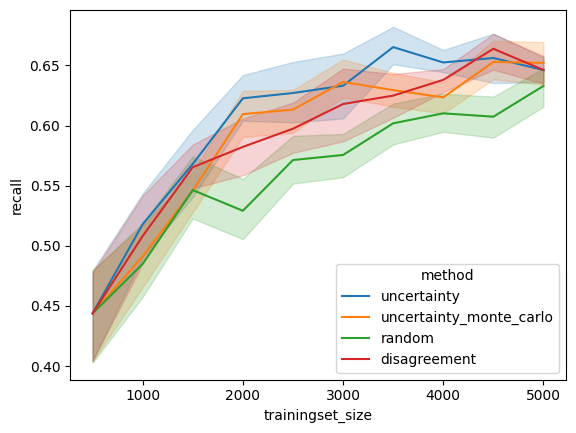

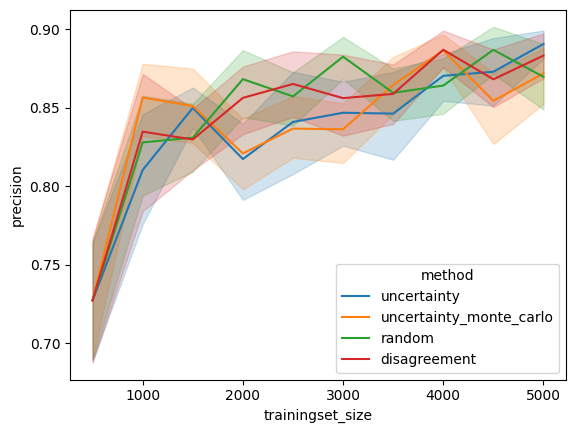

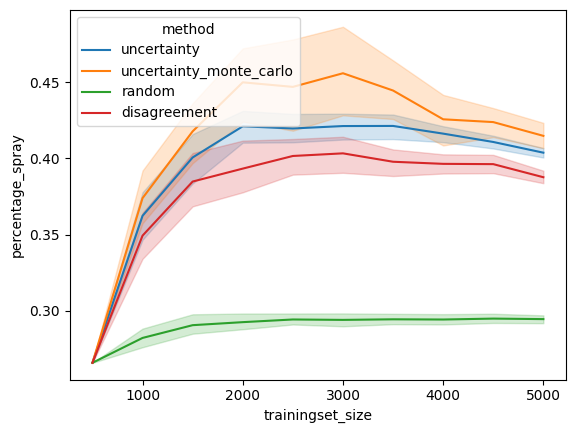

In [ ]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

# Influence preprocessing

## Masking vs pixel remapping

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution